<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.5/fashion_mnist_cnn_wgpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

print(x_train.shape)

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

sample_size=9

random_idx=np.random.randint(60000,size=sample_size)

x_train=np.reshape(x_train/255,(-1,28,28,1))
x_test=np.reshape(x_test/255,(-1,28,28,1))

print(x_train.shape)

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=777)
print('Fashion MNIST is ready!!')


(60000, 28, 28)
(60000, 28, 28, 1)
Fashion MNIST is ready!!


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import tensorflow as tf

# get gup_device
gpu_device_name = tf.test.gpu_device_name()
with tf.device(gpu_device_name):
  model=Sequential([
      Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
      MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
      Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
      Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
      Flatten(),
      Dense(64,activation='relu'),
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
  model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 14s 7ms/step - loss: 0.6735 - acc: 0.7532 - val_loss: 0.4777 - val_acc: 0.8224
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3959 - acc: 0.8581 - val_loss: 0.3430 - val_acc: 0.8772
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3367 - acc: 0.8798 - val_loss: 0.3127 - val_acc: 0.8888
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2997 - acc: 0.8926 - val_loss: 0.3140 - val_acc: 0.8870
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2776 - acc: 0.8997 - val_loss: 0.2805 - val_acc: 0.9007
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2604 - acc: 0.9044 - val_loss: 0.2855 - val_acc: 0.8982
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2463 - acc: 0.9099 - val_loss: 0.2739 - val_acc: 0.9035
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0

10000


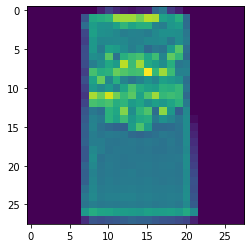

T-shirt/top : T-shirt/top


In [5]:
#model.evaluate(x_test,y_test)
results=model.predict(x_test)
print(len(results))
indx=np.random.randint(len(results))
arg_res=np.argmax(results,axis=-1)
plt.imshow(x_test[indx].reshape(28,28))
plt.show()
print(class_names[arg_res[indx]],":",class_names[np.argmax(y_test[indx])])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

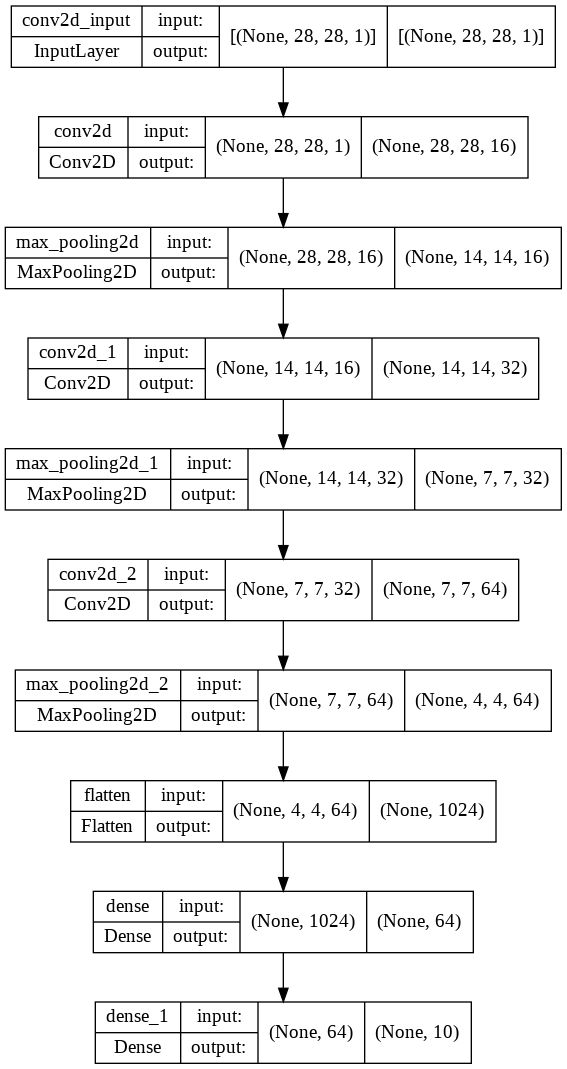

In [7]:
import os
from tensorflow.keras.utils import plot_model
plot_model(model,'./model.png',show_shapes=True)